In [12]:
import datetime
import pandas_datareader.data as web
import numpy as np

In [31]:
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.now()
stock='TSLA'
df = web.DataReader(stock, 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,64.421997,62.200001,62.400002,64.106003,21761000.0,64.106003
2018-01-03,65.050003,63.110001,64.199997,63.450001,22607500.0,63.450001
2018-01-04,63.709999,61.136002,62.574001,62.924000,49731500.0,62.924000
2018-01-05,63.448002,62.400002,63.324001,63.316002,22956000.0,63.316002
2018-01-08,67.403999,63.099998,63.200001,67.281998,49297000.0,67.281998


In [32]:
df['Close_Tomorrow'] = df['Close'].shift(-1)
df.head()

,High,Low,Open,Close,Volume,Adj Close,Close_Tomorrow
Date,,,,,,,
2018-01-02,64.421997,62.200001,62.400002,64.106003,21761000.0,64.106003,63.450001
2018-01-03,65.050003,63.110001,64.199997,63.450001,22607500.0,63.450001,62.924000
2018-01-04,63.709999,61.136002,62.574001,62.924000,49731500.0,62.924000,63.316002
2018-01-05,63.448002,62.400002,63.324001,63.316002,22956000.0,63.316002,67.281998
2018-01-08,67.403999,63.099998,63.200001,67.281998,49297000.0,67.281998,66.737999


In [33]:
df.dropna(inplace=True)
df['Daily_Return'] = (df['Close_Tomorrow'] - df['Close']) / df['Close']
df.head()

,High,Low,Open,Close,Volume,Adj Close,Close_Tomorrow,Daily_Return
Date,,,,,,,,
2018-01-02,64.421997,62.200001,62.400002,64.106003,21761000.0,64.106003,63.450001,-0.010233
2018-01-03,65.050003,63.110001,64.199997,63.450001,22607500.0,63.450001,62.924000,-0.008290
2018-01-04,63.709999,61.136002,62.574001,62.924000,49731500.0,62.924000,63.316002,0.006230
2018-01-05,63.448002,62.400002,63.324001,63.316002,22956000.0,63.316002,67.281998,0.062638
2018-01-08,67.403999,63.099998,63.200001,67.281998,49297000.0,67.281998,66.737999,-0.008085


In [34]:
# [1 if df.loc[date, 'Daily_Return'] > 0 else -1 for date in df.index]
df["Direction"] = np.where(df.Daily_Return > 0,1,-1)
df.head()

,High,Low,Open,Close,Volume,Adj Close,Close_Tomorrow,Daily_Return,Direction
Date,,,,,,,,,
2018-01-02,64.421997,62.200001,62.400002,64.106003,21761000.0,64.106003,63.450001,-0.010233,-1
2018-01-03,65.050003,63.110001,64.199997,63.450001,22607500.0,63.450001,62.924000,-0.008290,-1
2018-01-04,63.709999,61.136002,62.574001,62.924000,49731500.0,62.924000,63.316002,0.006230,1
2018-01-05,63.448002,62.400002,63.324001,63.316002,22956000.0,63.316002,67.281998,0.062638,1
2018-01-08,67.403999,63.099998,63.200001,67.281998,49297000.0,67.281998,66.737999,-0.008085,-1


### Moving Average

In [36]:
df['10MA'] = df['Close'].rolling(10).mean() #this is fast signal
df['35MA'] = df['Close'].rolling(35).mean() #this is slow signal

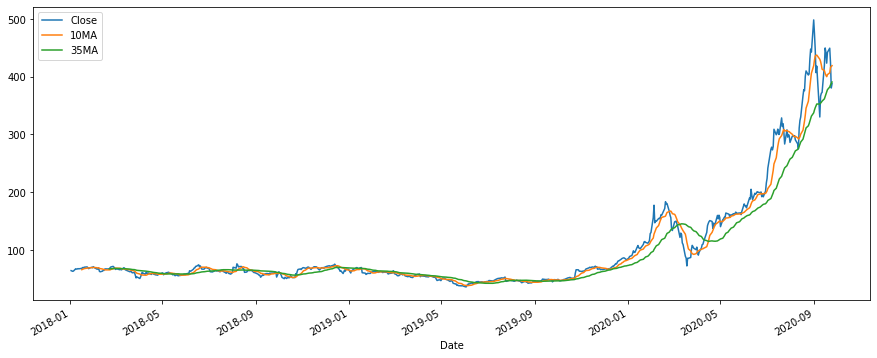

In [39]:
df['Close'].plot(legend=True)
df['10MA'].plot(legend=True)
df['35MA'].plot(legend=True,figsize=(15,6))

* **Notes**
* if 10ma > 35ma, hold(or buy) stock